Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\dell\Downloads\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.info() #identifying numerical and categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Data cleaning

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#preparing numerical columns together to detect ouliers
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest']
num_cols

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

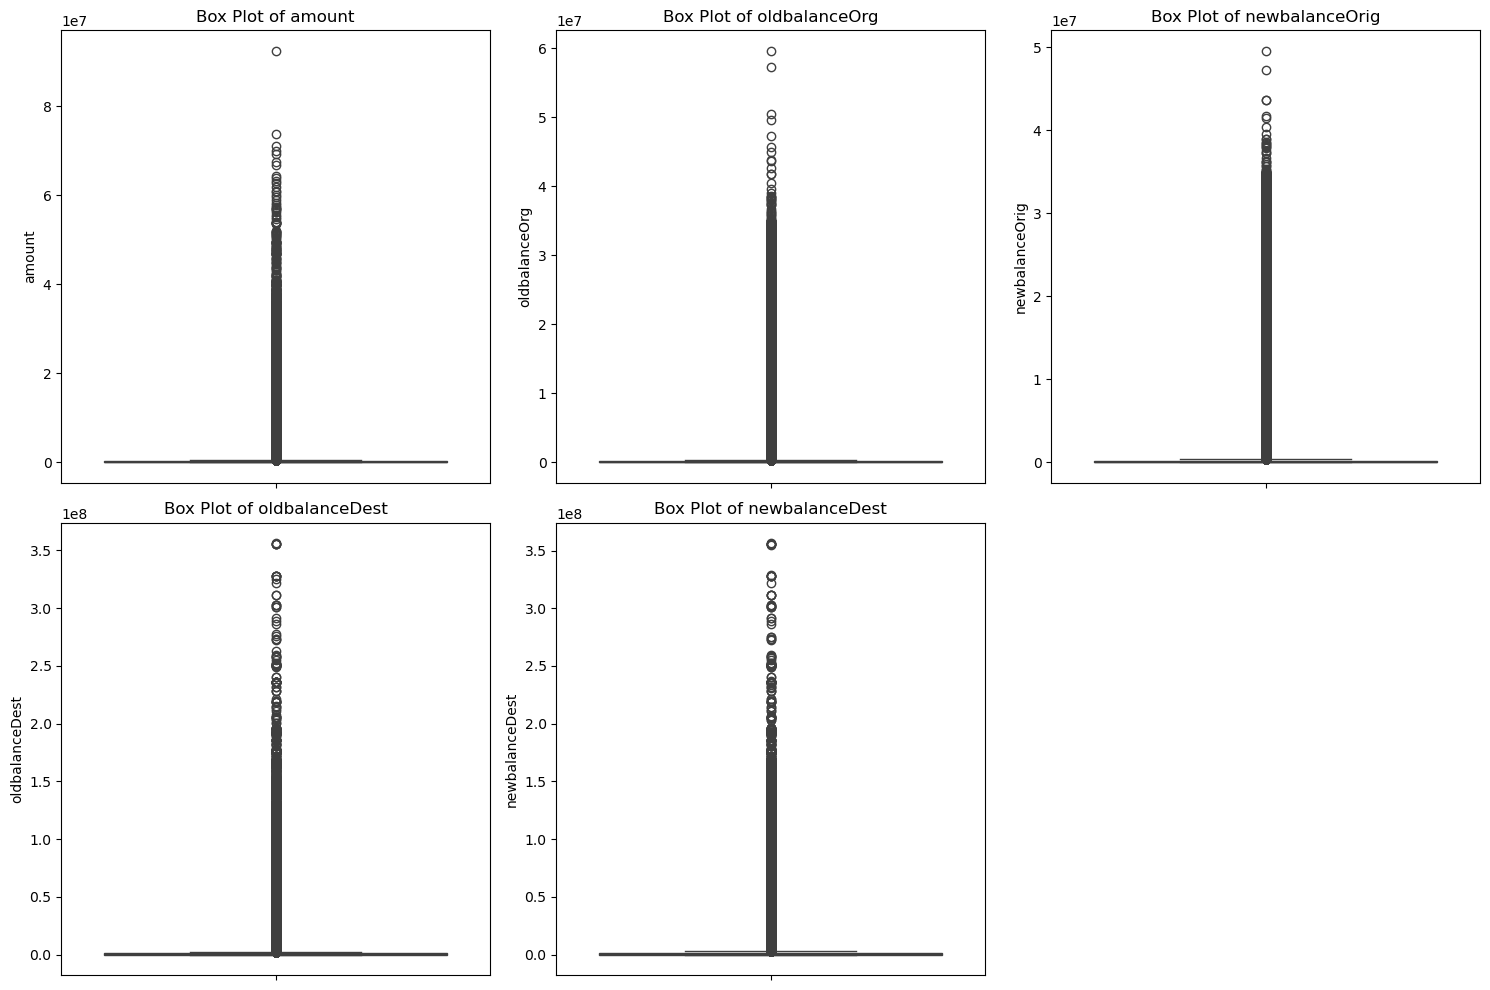

In [7]:
#outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [8]:
#handling outliers using Inter Quartile Range 
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR 
    df[col + '_capped'] = np.where(df[col] > upper_bound, upper_bound, df[col])

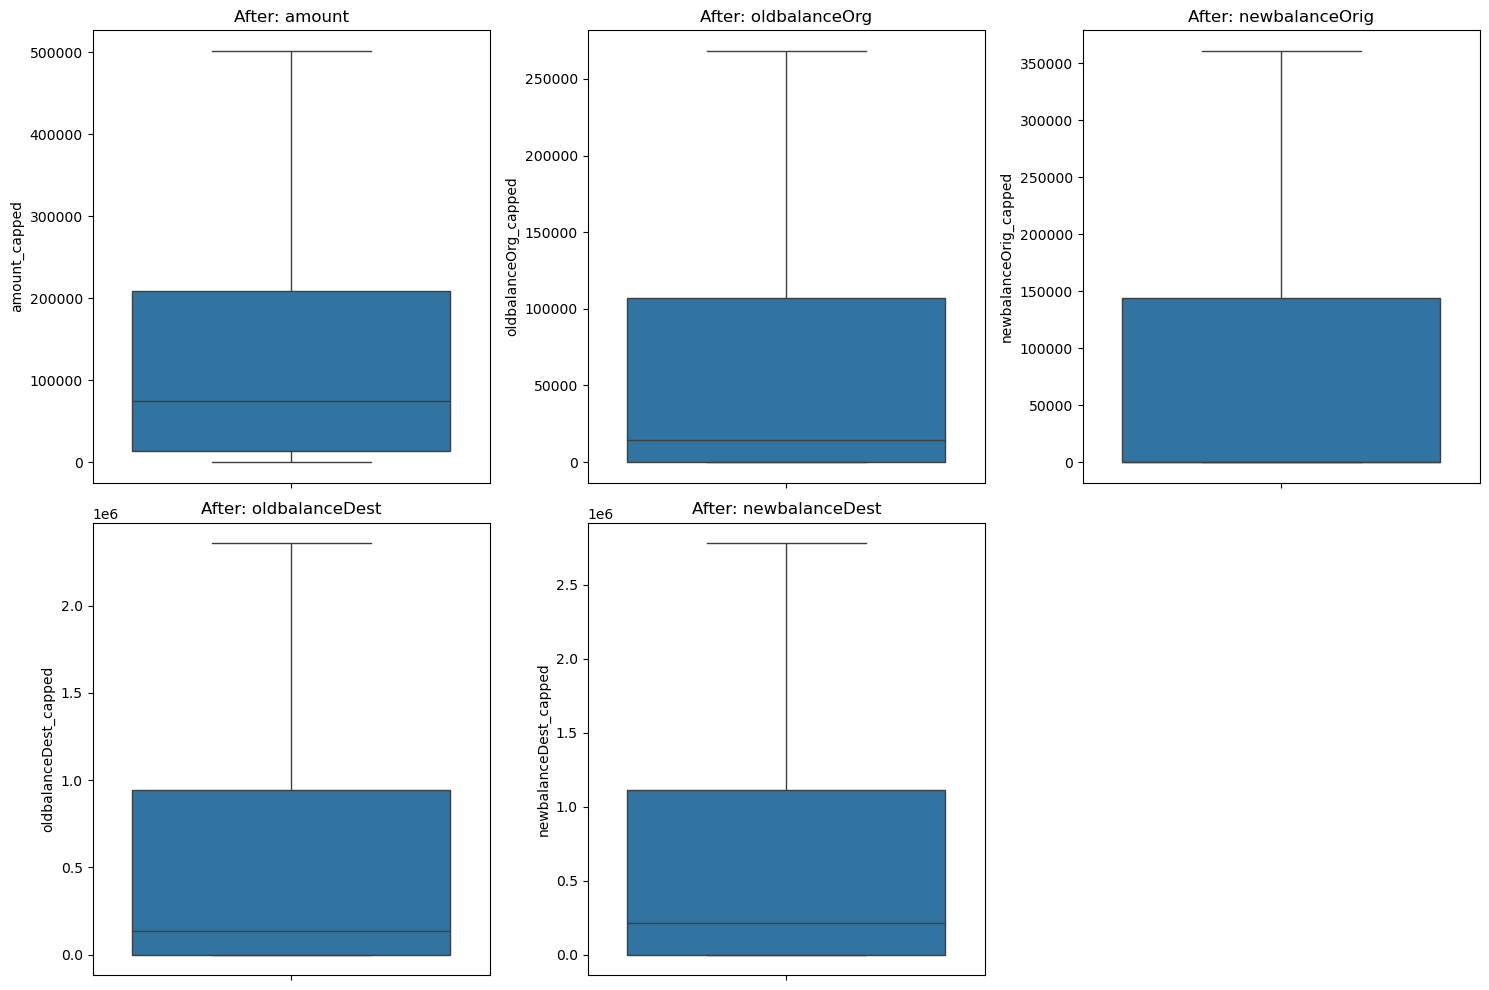

In [9]:
#plotting boxplots after handling outliers to check are they removed or not
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col + "_capped"])
    plt.title(f'After: {col}')
plt.tight_layout()
plt.show()

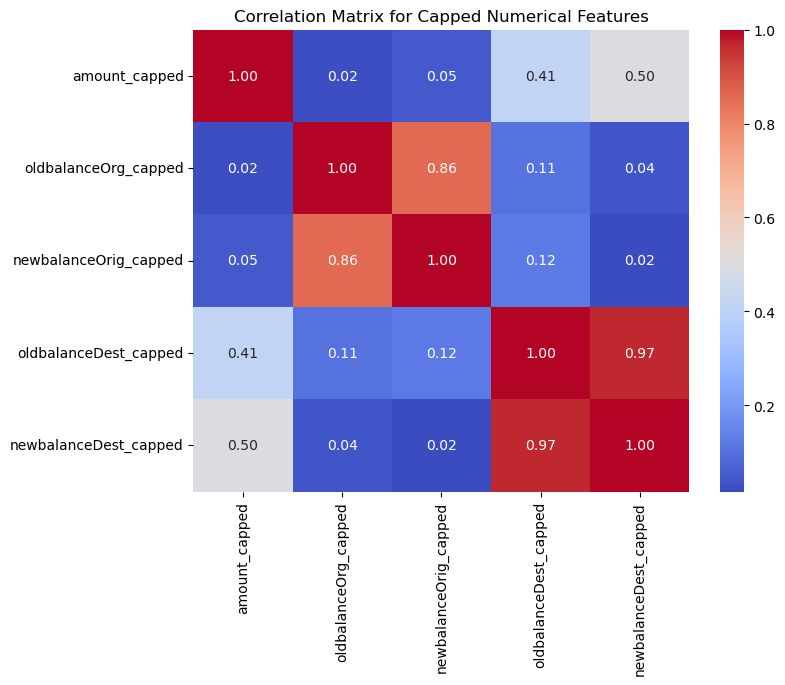

In [10]:
balance_cols_capped = [col + '_capped' for col in num_cols]
correlation_matrix = df[balance_cols_capped].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Capped Numerical Features')
plt.show() 

In [11]:
# Create 'Error' terms, which often reduce correlation and serve as strong fraud indicators.
df['Orig_Balance_Error'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['Dest_Balance_Error'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']

In [12]:
#hot encoding for column type
pd.get_dummies(df, columns=['type'], drop_first=True)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,oldbalanceOrg_capped,newbalanceOrig_capped,oldbalanceDest_capped,newbalanceDest_capped,Orig_Balance_Error,Dest_Balance_Error,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,...,170136.0000,160296.36,0.000000e+00,0.000,1.455192e-11,-9.839640e+03,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,...,21249.0000,19384.72,0.000000e+00,0.000,-1.136868e-12,-1.864280e+03,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,...,181.0000,0.00,0.000000e+00,0.000,0.000000e+00,-1.810000e+02,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,...,181.0000,0.00,2.118200e+04,0.000,0.000000e+00,-2.136300e+04,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,...,41554.0000,29885.86,0.000000e+00,0.000,0.000000e+00,-1.166814e+04,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,...,268287.9375,0.00,0.000000e+00,339682.130,0.000000e+00,0.000000e+00,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,...,268287.9375,0.00,0.000000e+00,0.000,0.000000e+00,-6.311409e+06,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,...,268287.9375,0.00,6.848884e+04,2779773.125,0.000000e+00,-1.000000e-02,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,...,268287.9375,0.00,0.000000e+00,0.000,0.000000e+00,-8.500025e+05,False,False,False,True


In [13]:
#feature selection
df = df.drop(['nameOrig', 'nameDest'], axis=1)

Missing Values: Checked using df.isnull().sum(). 
The dataset was found to be clean with no null values.
Outliers: Detected using box plots.
Handled by capping values at the Upper Bound (Q3 + 1.5 \times IQR). 
This preserves the "high-value" signal of fraud while preventing mathematical distortion.
Multi-collinearity: Addressed by dropping unique IDs (nameOrig, nameDest) and creating Error Terms.
By calculating Orig_Balance_Error, we capture the relationship between balances and amounts in one column, reducing redundant correlations.

In [14]:
X = df[['step',  'amount_capped',  'Orig_Balance_Error',  'Dest_Balance_Error', 'isFlaggedFraud']]
y = df['isFraud']

Modelling

In [15]:
#modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE # Used if class weights are insufficient
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier(
    n_estimators=100,             # Number of trees
    class_weight='balanced',      # Crucial for imbalanced data
    max_depth=15,                 # Limit depth to prevent slight overfitting
    random_state=42,
    n_jobs=-1                     # Use all available cores for faster training
)
model.fit(X_train, y_train) 

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

Model Description
Algorithm: RandomForestClassifier.

Configuration: * class_weight='balanced': This is the most critical setting; it tells the model to give more "importance" to the rare fraud cases to combat the extreme class imbalance.

max_depth=15: Used to ensure the model learns general patterns rather than memorizing (overfitting) specific rows.

stratify=y: Used during the train-test split to ensure both sets have the same percentage of fraud.

In [17]:
# 1. Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probabilities for ROC-AUC

In [18]:
# 2. Confusion Matrix
print(confusion_matrix(y_test, y_pred)) 

[[1241186   29695]
 [    175    1468]]


In [27]:
# 3. Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.05      0.89      0.09      1643

    accuracy                           0.98   1272524
   macro avg       0.52      0.94      0.54   1272524
weighted avg       1.00      0.98      0.99   1272524



In [ ]:
#The model achieves a high Recall (89%), successfully identifying the majority of fraudulent activity.
#However, the low Precision (5%) indicates a high false-positive rate. 
#Future tuning will focus on threshold optimization to reduce customer friction while maintaining high detection rates.

In [20]:
# 4. ROC-AUC Score
auc_score = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {auc_score:.4f}")


ROC-AUC Score: 0.9913


Text(0.5, 1.0, 'Confusion Matrix')

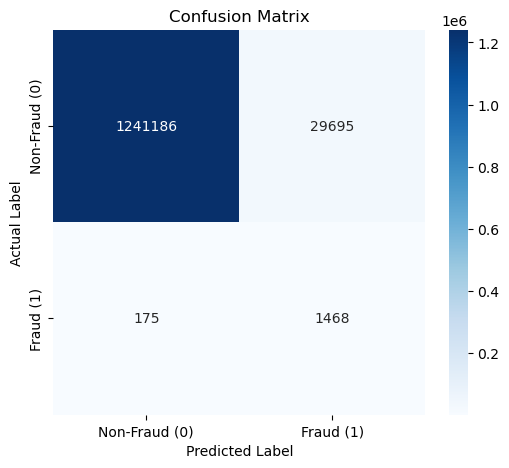

In [28]:
# Visualization confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Fraud (0)', 'Fraud (1)'], 
            yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [22]:
# 1. Extract feature importance from the trained model
feature_importances = model.feature_importances_

# 2. Get the feature names used for training
feature_names = X.columns 

In [23]:
# 3. Create a DataFrame for easy sorting and viewing
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

In [24]:
# 4. Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [25]:
# 5. Print the top 10 key factors
print("--- Top 10 Key Factors Predicting Fraud ---")
print(importance_df.head(10)) 

--- Top 10 Key Factors Predicting Fraud ---
              Feature  Importance
2  Orig_Balance_Error    0.571510
1       amount_capped    0.210448
0                step    0.123709
3  Dest_Balance_Error    0.091534
4      isFlaggedFraud    0.002799


Orig_Balance_Error (57.1%): By far the strongest predictor.

amount_capped (21.0%): The size of the transaction.

step (12.3%): The timing of the transaction.

Dest_Balance_Error (9.1%): Discrepancies at the receiving end.

Orig_Balance_Error makes sense because fraud involves emptying an account; if the amount sent doesn't match the change in balance, it’s a red flag.

Amount makes sense as fraudsters aim for high-value targets.

Step makes sense as fraud often happens in bursts or specific time windows to avoid peak monitoring hours.

In [26]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_capped,oldbalanceOrg_capped,newbalanceOrig_capped,oldbalanceDest_capped,newbalanceDest_capped,Orig_Balance_Error,Dest_Balance_Error
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,170136.0,160296.36,0.0,0.0,1.455192e-11,-9839.64
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,21249.0,19384.72,0.0,0.0,-1.136868e-12,-1864.28
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,181.00,181.0,0.00,0.0,0.0,0.000000e+00,-181.00
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,181.0,0.00,21182.0,0.0,0.000000e+00,-21363.00
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,41554.0,29885.86,0.0,0.0,0.000000e+00,-11668.14


Prevention Strategies :

1.Real-time Balance Validation: Infrastructure should automatically flag transactions where OldBalance - Amount not equal to NewBalance.

2.Velocity Limits: Implement stricter limits on the number of TRANSFER to CASH_OUT sequences an account can perform in a short step period.

3.Identity Verification: Trigger Multi-Factor Authentication (MFA) specifically for transactions that create a high Orig_Balance_Error.

Determination of Success  :

1.To verify if these actions work, we would monitor:

2.Precision Improvement: A decrease in False Positives (the 29,695 number) without losing the 1,468 True Positives.

3.Cost Savings: Calculating the dollar amount of fraud prevented versus the cost of investigating false alarms.

4.AUPRC (Area Under Precision-Recall Curve): If this metric increases, the system is becoming more "accurate" in its suspicion.